### Task 1(20 points): We discussed how we can formulate RL problems as an MDP. Describe any real-world application that can be formulated as an MDP. Describe what the state space, action space, transition model, and reward are. You do not ne ed to be precise in the description of the transition model and reward (no formula is needed). Qualitative description is enough.


Think of grid world robot example: each cell in the m by n grid is a state, Actions are left, right, up, down, and robot can take one action per time step, also actions are stochastic, meaning that transition from one cell to the other is, say only 80% correct. Agent gets rewards only if it is in some particular cells, and goal of agent is to maximize reward

### Task 2(30 points): RL is used in various sectors - Healthcare, recommender systems and trading are a few of those. Pick one of the three areas. Explain one of the problems in any of these domains that can be more effectively solved by reinforcement learning. Find an open-source project (if any) that has addressed this problem. Explain this project in detail.

Health / Wellness apps have historically suffered from low adoption rates. Personalized recommendations have the potential of improving adoption, by making increasingly relevant and timely recommendations to users. While recommendation engines (and consequently, the apps based on them) have grown in maturity, they still suffer from the ‘cold start’ problem and the fact that it is basically a push-based mechanism lacking the level of interactivity needed to make such apps appealing to millennials.

#### paper: Delayed Rewards in the context of Reinforcement Learning based Recommender Systems

They present a Wellness app case-study where they applied a combination of Reinforcement Learning (RL) and Natural Language Processing (NLP) / Chatbots to provide a highly personalized and interactive experience to users. They focus on the interactive aspect of the app, where the app is able to profile and converse with users in real-time, providing relevant content adapted to the current sentiment and past preferences of the user.

RL is able to achieve complex goals by maximizing a reward function in real-time. It also allows it to adapt faster to real-time changes in the user sentiment. Previous works have explored RL in the context of Recommender Systems, and enterprise adoption also seems to be gaining momentum with the recent availability of Cloud APIs (e.g. Azure Personalizer ) and Google’s RecSim . However, they still work like a typical Recommender System. Given a user profile and categorized recommendations, the system makes a recommendation based on popularity, interests, demographics, frequency and other features. The main novelty of these systems is that they are able to identify the features (or combination of features) of recommendations getting higher rewards for a specific user; which can then be customized for that user to provide better recommendations.


### Task 3(50 points): Implement the game of tic-tac-toe (write a class that implements an agent playing Tic Tac Toe and learning its Q function) using the Q-learning technique (see the resource provided in class for more details). Clearly describe your evaluation metric and demonstrate a few runs. You might need to use some online resources to proceed on this. Do not forget to cite those.

In [3]:
from TCGame_Env import TicTacToe #environment file for tic-tac-toe game
import collections
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
## defining object for the Tictac toe environment created as MDP in TCGame_env
env = TicTacToe()

def Q_state(state):
    return ('-'.join(str(e) for e in state)).replace('nan','x')

# Defining a function which will return valid actions 
def valid_actions(state):

    valid_Actions = []
    valid_Actions = [i for i in env.action_space(state)[0]]
    return valid_Actions

# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0
# printing the default tic tac toe board positions
Q_state(env.state)
# Printing all the valid actions
valid_actions(env.state)

[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

#### Epsilon-greedy strategy

In [4]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # print(epsilon)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]    #Exploration: randomly choosing and action
    
    return action

In [5]:
# Initialising Q_dictionary and States_track
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

# Initialising states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-x-x-x-x-x-x-x-x',(1,9)),
                       ('x-3-x-x-1-x-x-x-x',(7,5)),('x-5-x-x-x-x-5-7-x',(8,2))]    #select some 4 Q-values
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []
        
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
# definign a function for saving states tracking

def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action]) 
                
#Defining hyperparameters for the training

EPISODES = 50000
LR = 0.01                   # learning rate
GAMMA = 0.9                # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.001        # epsilon decay rate
threshold = 200       # no of episodes after which states_tracked wwill be saved
policy_threshold = 300   # no of episodes after which Q dictionary/table will be saved

In [6]:
initialise_tracking_states()

#### An agent that learns the game by Q-Learning

In [7]:
import time 
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe() # call the environment
    curr_state = env.state    
    done = False  
    add_to_dict(curr_state)  # adding the current state to dictionary

    while done != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)   # applying epislon method
        next_state, reward, done = env.step(curr_state, curr_action) # getting reward
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)

        # Updating rules
        if done != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

        # navigating to next state
        curr_state = next_state
        
     #states tracking   
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracking')

    if ((episode+1)% policy_threshold) == 0:  #every 300th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy_Q_dict')  
        

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracking')   
save_obj(Q_dict,'Policy_Q_dict')

#Q_dict  #uncomment for showing details of RL

#### Convergence Check

<function matplotlib.pyplot.show(close=None, block=None)>

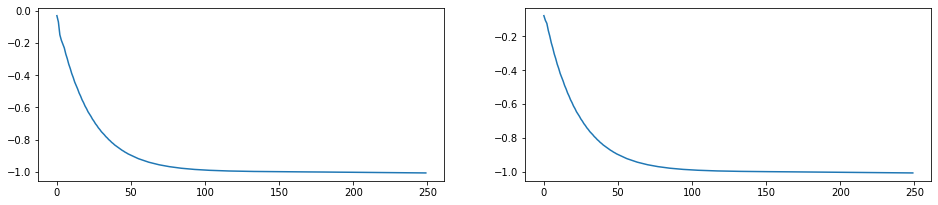

In [10]:
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,5)]))
plt.show


x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,9)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,9)]))
plt.show

#Checking whether Q-values learnt by the agent have converged or not